## Análisis Exploratorio de datos

### Importando Librerías

In [1]:
# eliminar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
#llamo el dataset a analizar
Overdose = pd.read_csv("datasets/VSRR_Provisional_Drug_Overdose_Death_Counts_ cleaned.csv")
Overdose.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Number of Deaths,4133.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [4]:
# cantidad de filas y columnas
Overdose.shape

(41625, 12)

In [5]:
#medidas de estadística descriptiva 
Overdose.describe()


,Year,Data Value,Percent Pending Investigation
count,41625.000000,2.835200e+04,41625.000000
mean,2017.640000,1.622501e+04,0.118325
std,1.808446,1.493001e+05,0.164735
min,2015.000000,1.000000e+01,0.000000
25%,2016.000000,9.600000e+01,0.017452
50%,2018.000000,3.220000e+02,0.052672
75%,2019.000000,1.447250e+03,0.153807
max,2021.000000,3.536272e+06,1.411568


In [6]:
Overdose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41625 entries, 0 to 41624
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          41625 non-null  object 
 1   Year                           41625 non-null  int64  
 2   Month                          41625 non-null  object 
 3   Period                         41625 non-null  object 
 4   Indicator                      41625 non-null  object 
 5   Data Value                     28352 non-null  float64
 6   Percent Complete               28305 non-null  object 
 7   Percent Pending Investigation  41625 non-null  float64
 8   State Name                     41625 non-null  object 
 9   Footnote                       35388 non-null  object 
 10  Footnote Symbol                41625 non-null  object 
 11  Predicted Value                20571 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usag

In [7]:
#busqueda de datos nulos 
Overdose.isnull().sum()

State                                0
Year                                 0
Month                                0
Period                               0
Indicator                            0
Data Value                       13273
Percent Complete                 13320
Percent Pending Investigation        0
State Name                           0
Footnote                          6237
Footnote Symbol                      0
Predicted Value                  21054
dtype: int64

In [8]:
# Excluir la columna "Number of Deaths"
Overdose = Overdose[Overdose['Indicator'] != 'Number of Deaths']

# Grouping the data by Indicator and summing the Data Value to get total deaths per drug
drug_deaths = Overdose.groupby('Indicator')['Data Value'].sum().sort_values(ascending=False)

# Displaying the drugs most commonly involved in overdose deaths
print(drug_deaths.head())

Indicator
Number of Drug Overdose Deaths                                                 10108720.0
Opioids (T40.0-T40.4,T40.6)                                                     5226485.0
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)     4442193.0
Synthetic opioids, excl. methadone (T40.4)                                      3299223.0
Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)                1714652.0
Name: Data Value, dtype: float64


In [10]:
Cant_states=Overdose["State Name"].unique()
Cant_states

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Virginia', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming',
       'New York City'], dtype=object)

In [13]:
Cant_states=Overdose["State Name"].unique()
Cant_states=len(Cant_states)
print("Cantidad de estados en el listado:", Cant_states)

Cantidad de estados en el listado: 53


### Indicadores

In [9]:
#creación de variables categoricas para luego transformar en dummies 
v_categoricas=["State", "Year", "Month","Indicator"]
v_categoricas

['State', 'Year', 'Month', 'Indicator']

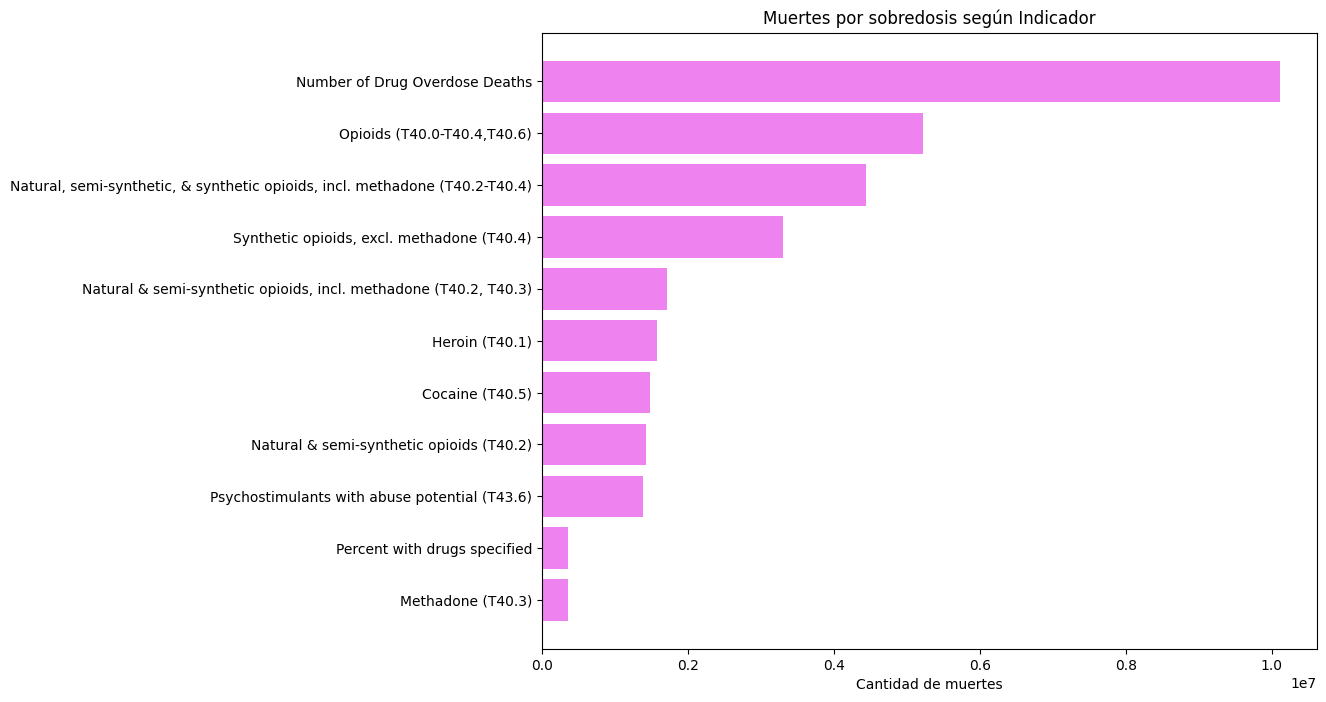

In [11]:
indicadores = drug_deaths.index
valores= drug_deaths.values

plt.figure(figsize=(10, 8))

plt.barh(indicadores, valores, color= "violet")
plt.xlabel("Cantidad de muertes")
plt.title("Muertes por sobredosis según Indicador")
plt.gca().invert_yaxis()#invierte los ejes y los ordena 
plt.show()


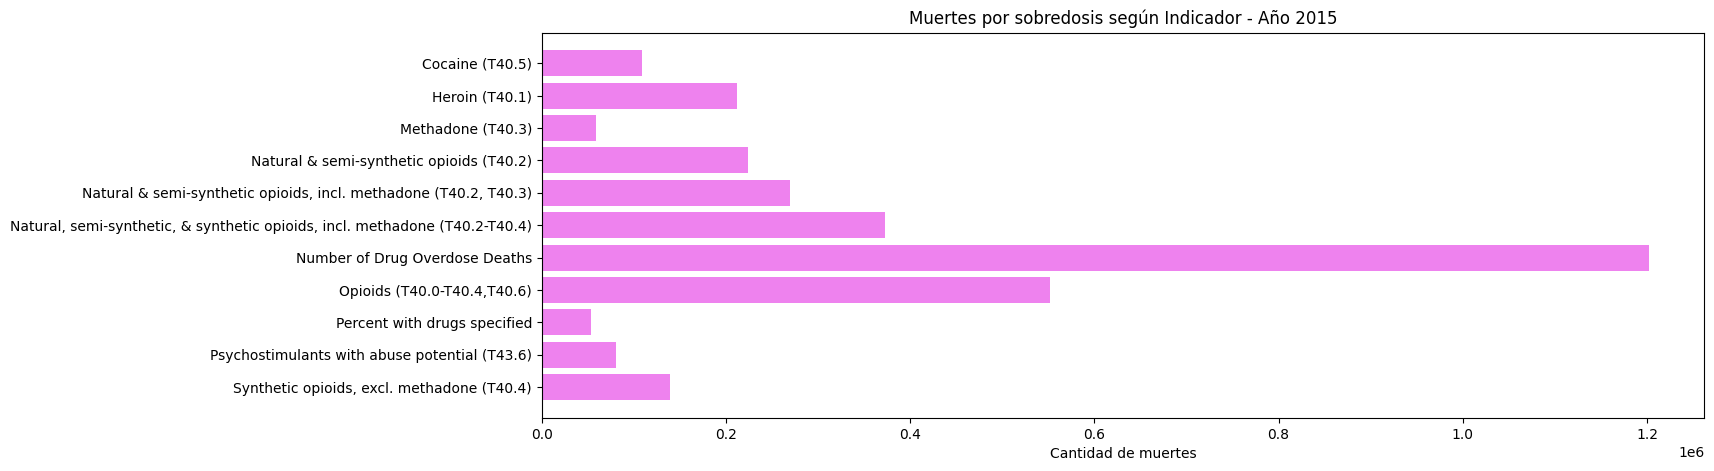

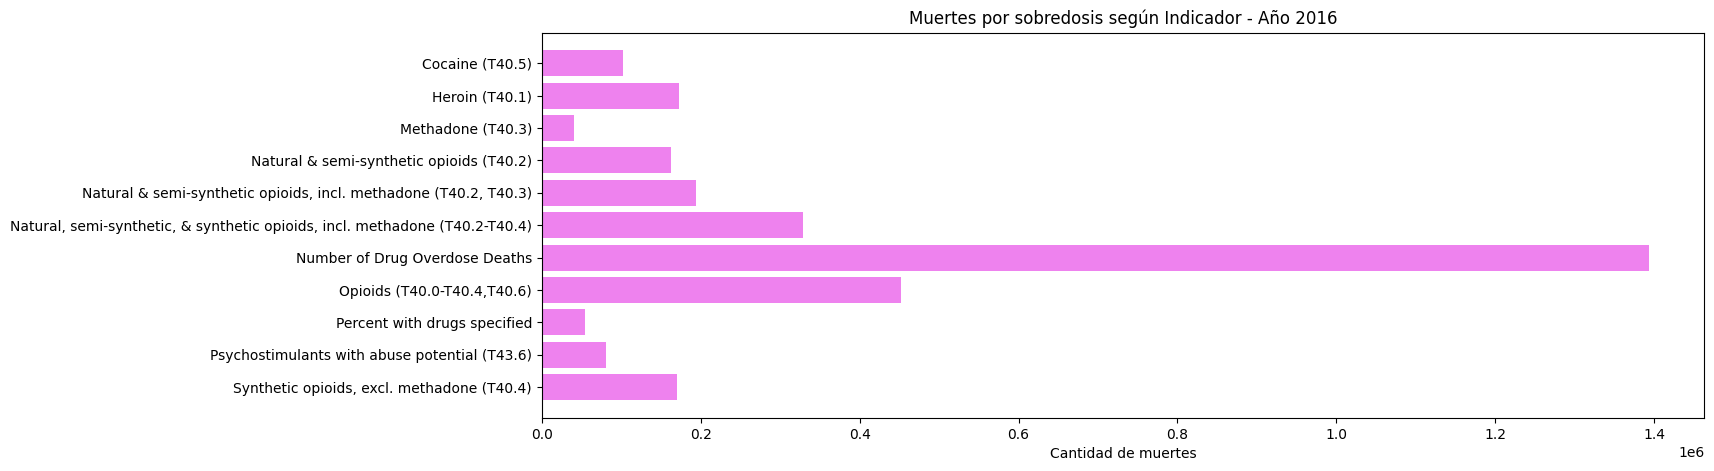

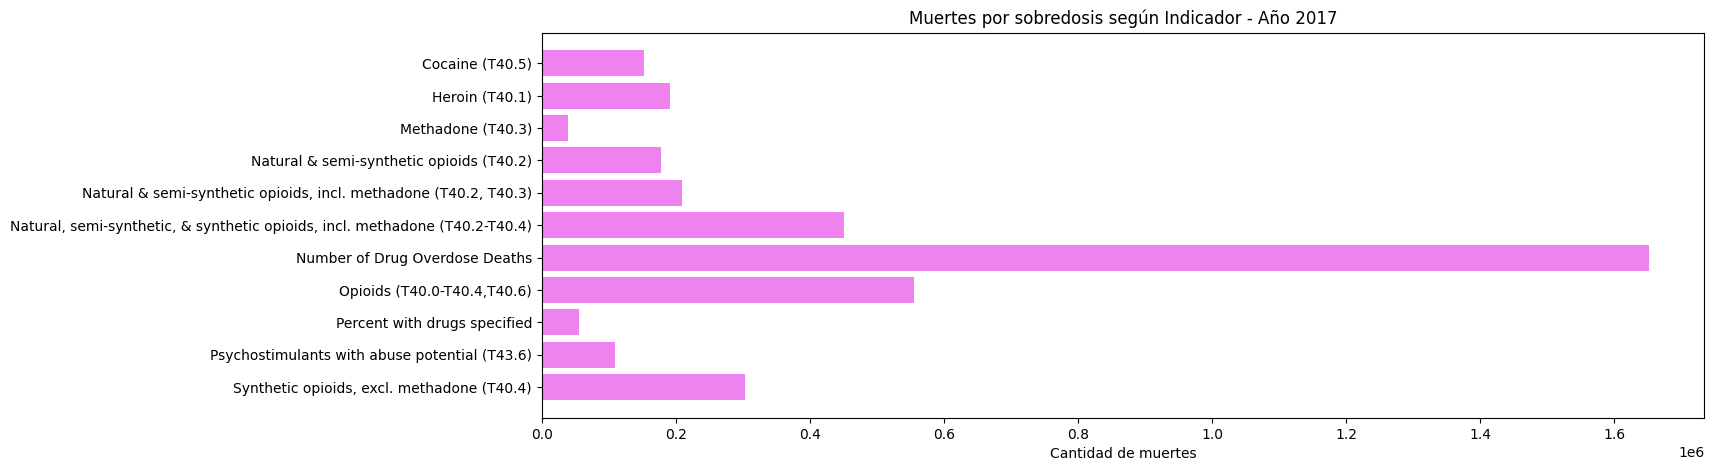

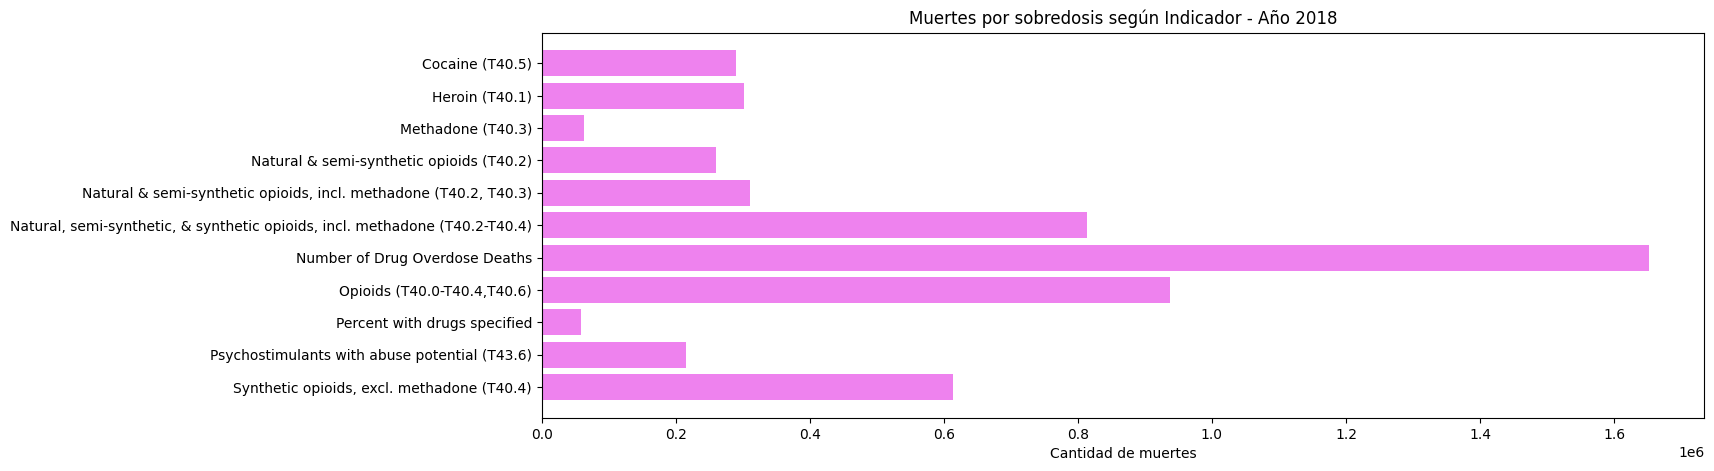

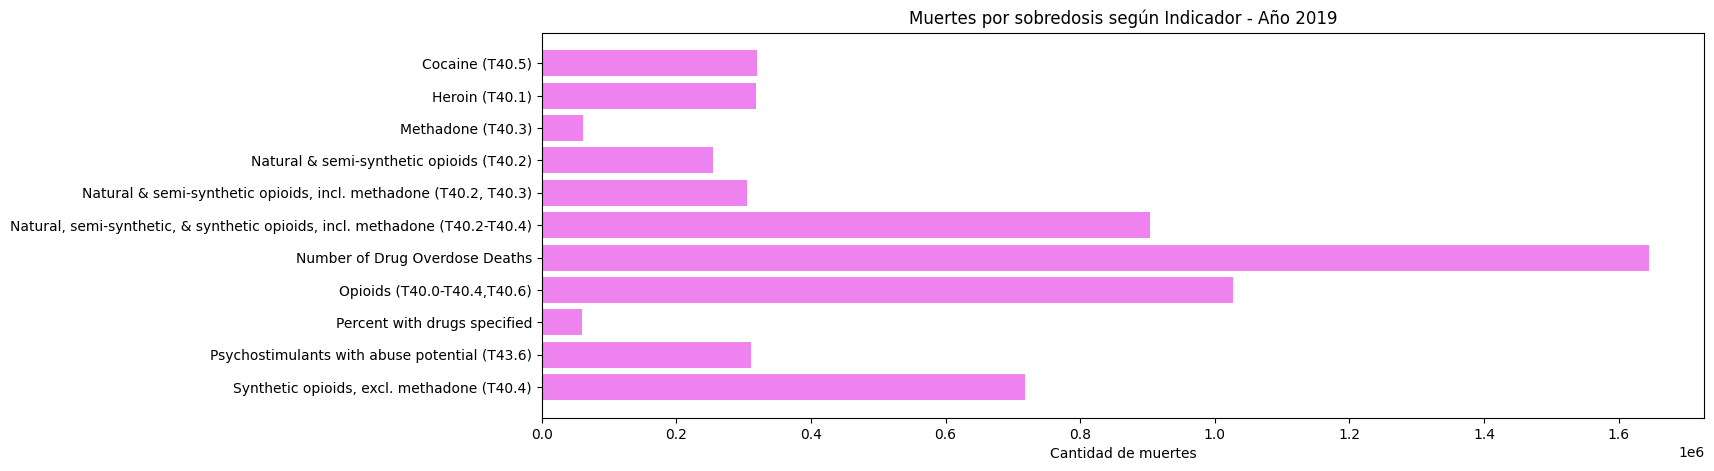

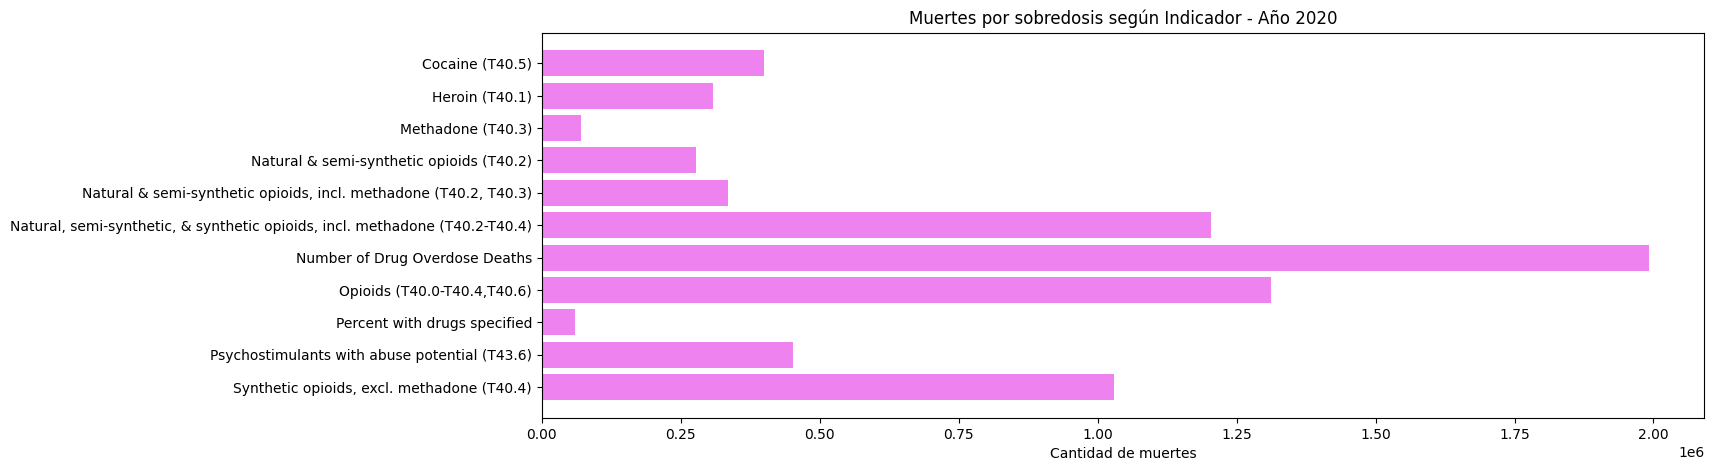

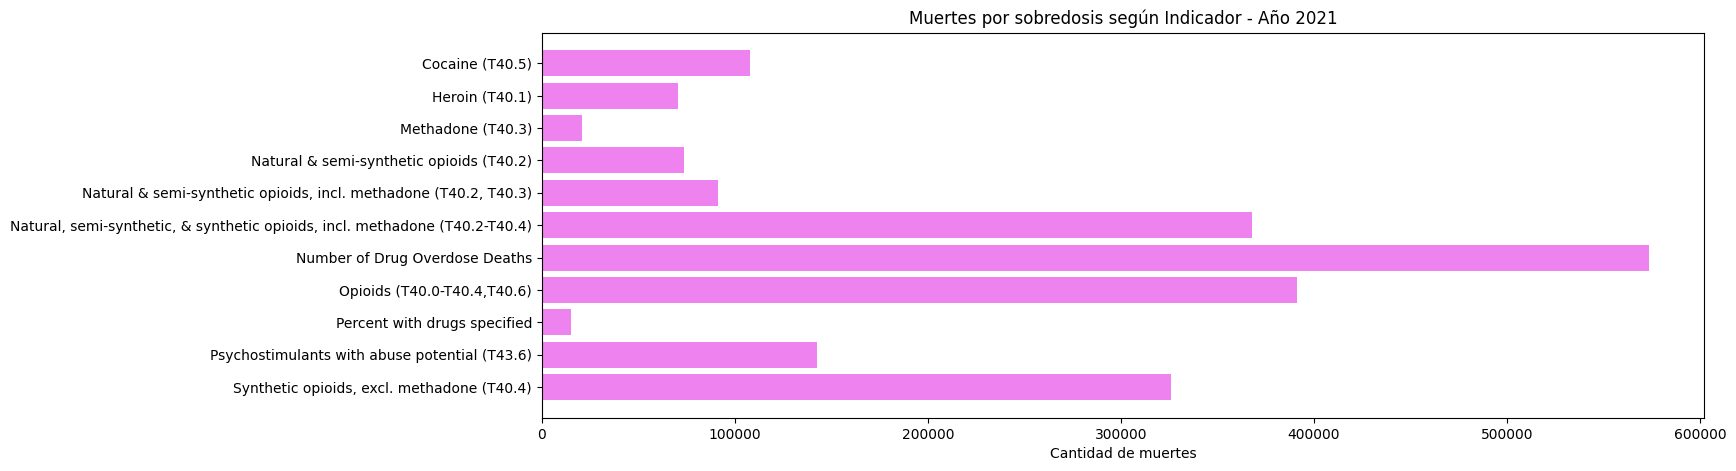

In [12]:

# Agrupar los datos por año y por indicador, y sumar los valores de cada indicador
drug_deaths_yearly = Overdose.groupby(['Year', 'Indicator'])['Data Value'].sum()

# Recorrer cada año y graficar los indicadores correspondientes
for year in drug_deaths_yearly.index.get_level_values('Year').unique():
    plt.figure(figsize=(15, 5))
    data_year = drug_deaths_yearly.loc[year]
    indicadores = data_year.index
    valores = data_year.values
    plt.barh(indicadores, valores, color="violet")
    plt.xlabel("Cantidad de muertes")
    plt.title(f"Muertes por sobredosis según Indicador - Año {year}")
    plt.gca().invert_yaxis()  # Invierte los ejes y los ordena
    plt.show()

#### Conclusión
#### Para el período de tiempo analizado la mayor cantidad de muertes por sobredosis, se produce por el consumo de opioides. 

### Creación de columna Date_Month_Year y dataset de Número de muertes por sobredosis solamente

In [13]:
import datetime

Overdose["Year"] = Overdose["Year"].astype(str)
Overdose["Date_Month_Year"] = Overdose["Month"] + "" + Overdose["Year"]

Overdose["Date"]= pd.to_datetime(Overdose["Date_Month_Year"], format= "%B%Y")

Num_of_drug_Overdose= Overdose[Overdose.Indicator == "Number of Drug Overdose Deaths"]

Num_of_drug_Overdose

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date_Month_Year,Date
10,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126,April2015,2015-04-01
12,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,124,August2015,2015-08-01
30,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,121,December2015,2015-12-01
38,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,127,February2015,2015-02-01
49,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126,January2015,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41573,YC,2020,October,12 month-ending,Number of Drug Overdose Deaths,2039.0,100,0.060339,New York City,Underreported due to incomplete data.,*,"2,048",October2020,2020-10-01
41581,YC,2020,September,12 month-ending,Number of Drug Overdose Deaths,1989.0,100,0.060269,New York City,Underreported due to incomplete data.,*,"1,997",September2020,2020-09-01
41597,YC,2021,February,12 month-ending,Number of Drug Overdose Deaths,2210.0,100,0.173187,New York City,Underreported due to incomplete data.,*,"2,242",February2021,2021-02-01
41604,YC,2021,January,12 month-ending,Number of Drug Overdose Deaths,2203.0,100,0.125215,New York City,Underreported due to incomplete data.,*,"2,215",January2021,2021-01-01


In [36]:
Num_of_drug_Overdose.to_csv("datasets/Num_of_drug_Overdose.csv", index= False)


### Cantidad de muertes por sobredosis y por estado

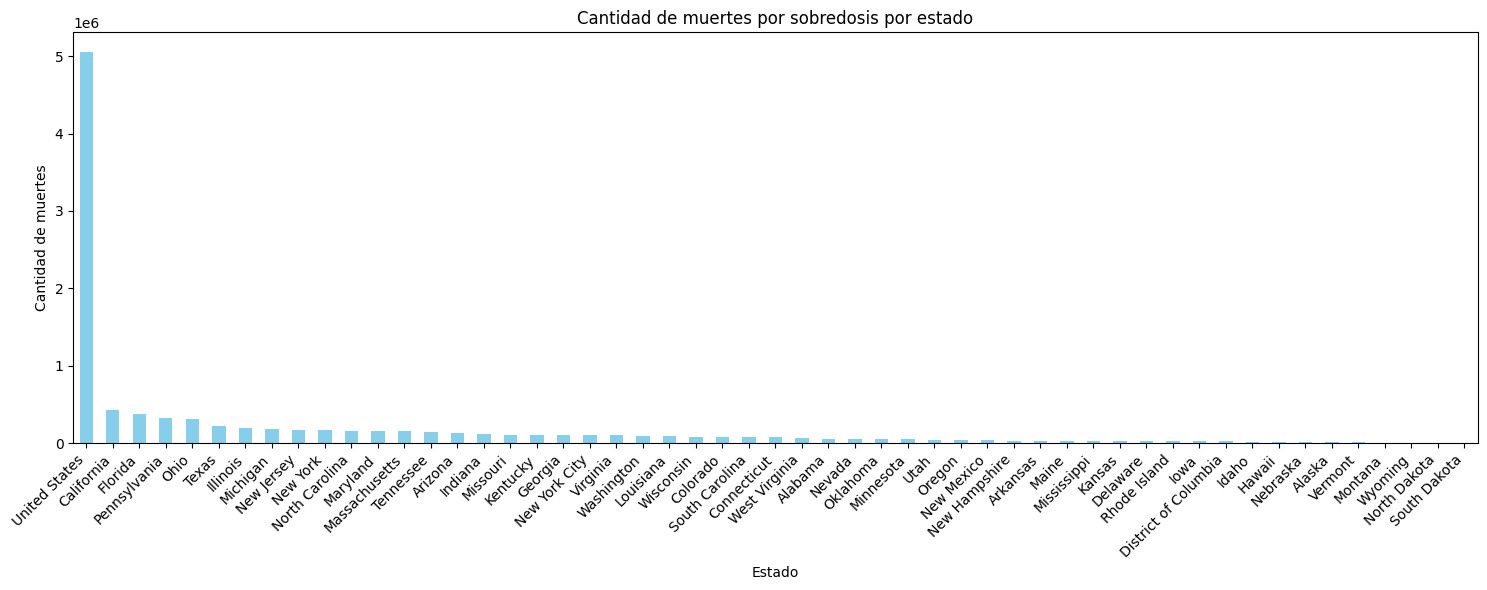

In [38]:
#agrupo datos por estado y sumo
deaths_state= Num_of_drug_Overdose.groupby("State Name")["Data Value"].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))

deaths_state.plot(kind="bar", color= "skyblue")

plt.title("Cantidad de muertes por sobredosis por estado")
plt.xlabel('Estado')
plt.ylabel('Cantidad de muertes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

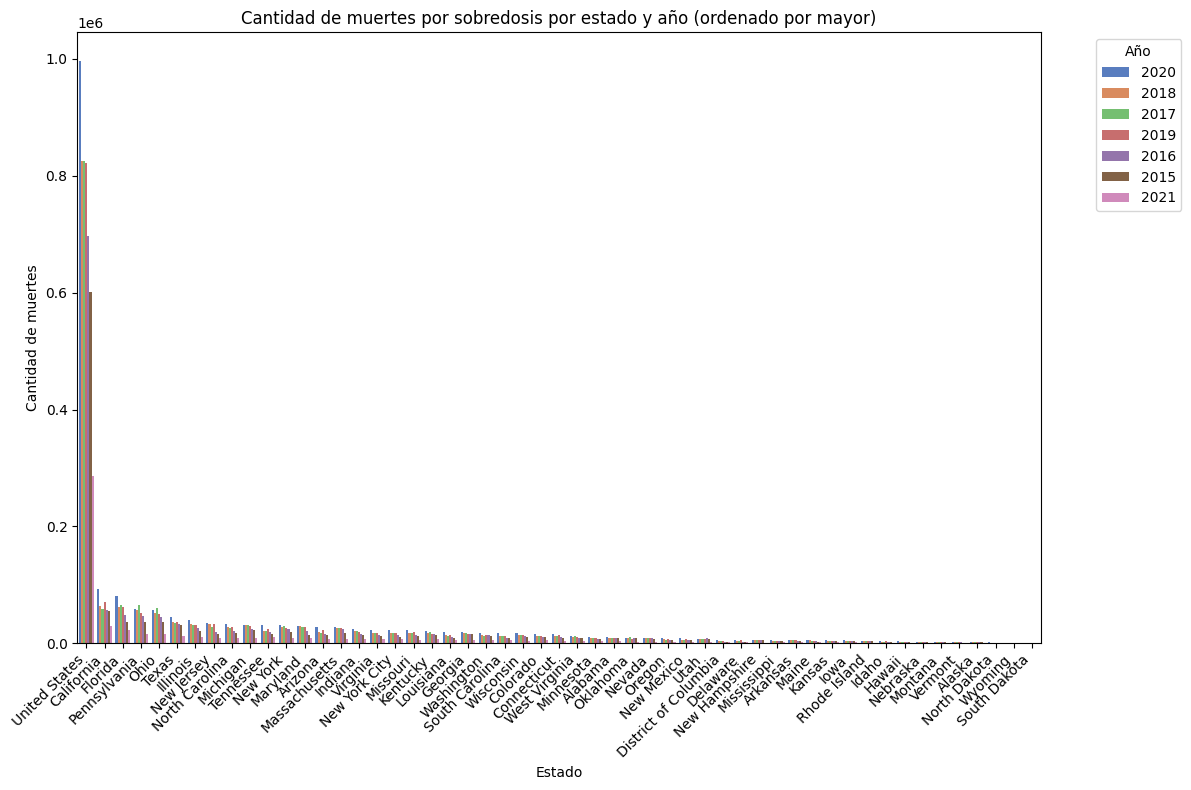

In [40]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_año = Num_of_drug_Overdose.groupby(['State Name', 'Year'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_año.sort_values(by='Data Value', ascending=False)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_sorted, x='State Name', y='Data Value', hue='Year', palette='muted', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_sorted['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

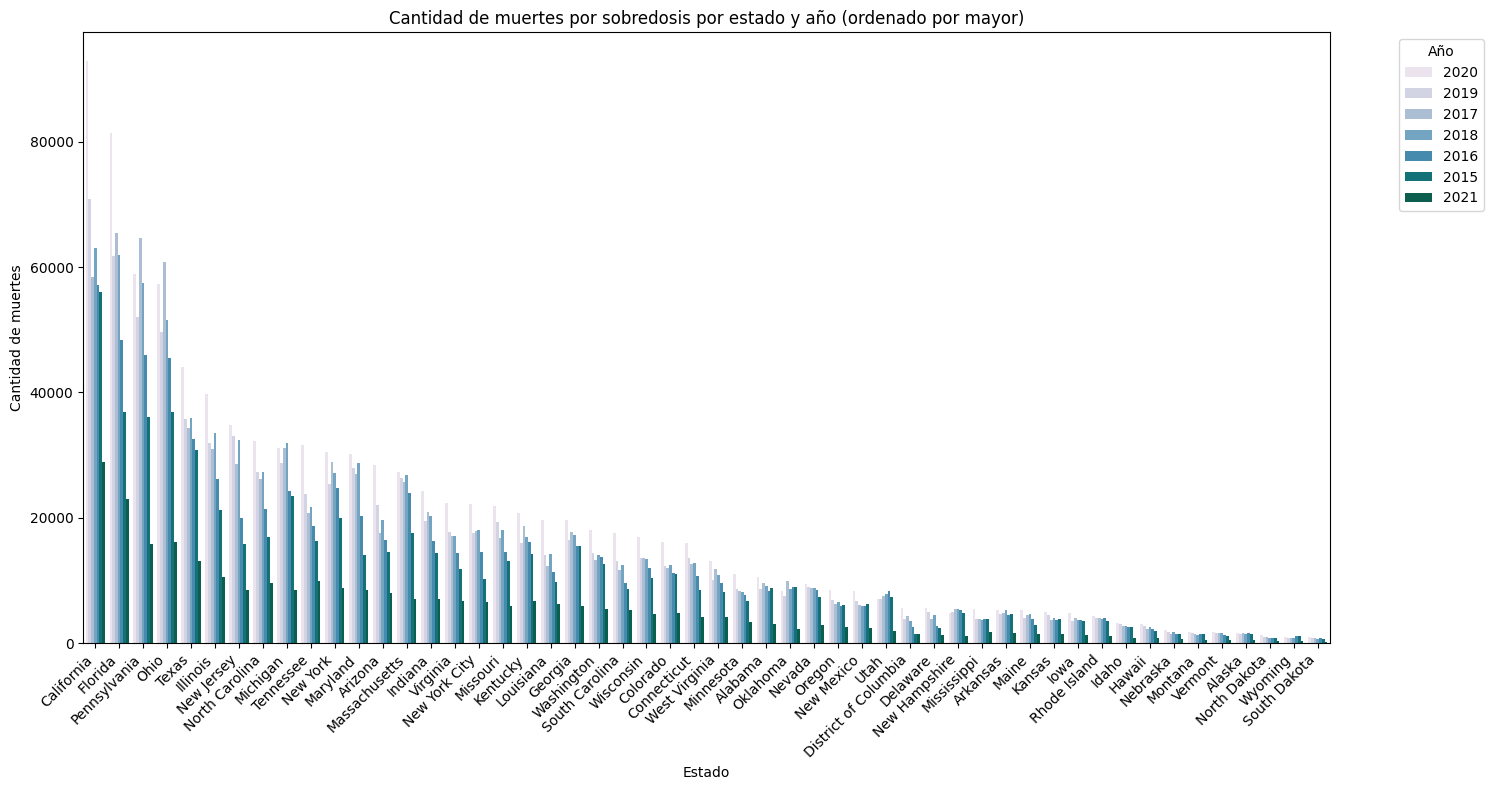

In [48]:

# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Year', palette='PuBuGn', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Conclusión
#### Para el período de tiempo analizado, los Estados con mayor cantidad de muertes por sobredosis son California, Florida, Pensylvania, Ohio y Texas. 
#### Puede verse en el análisis anual, que el 2020 y 2019 se presentaron como los años con los mayores casos, mientras que 2021 el que menor cantidad de casos presenta.


### Cantidad de muertes por sobredosis relacionadas con el mes del año

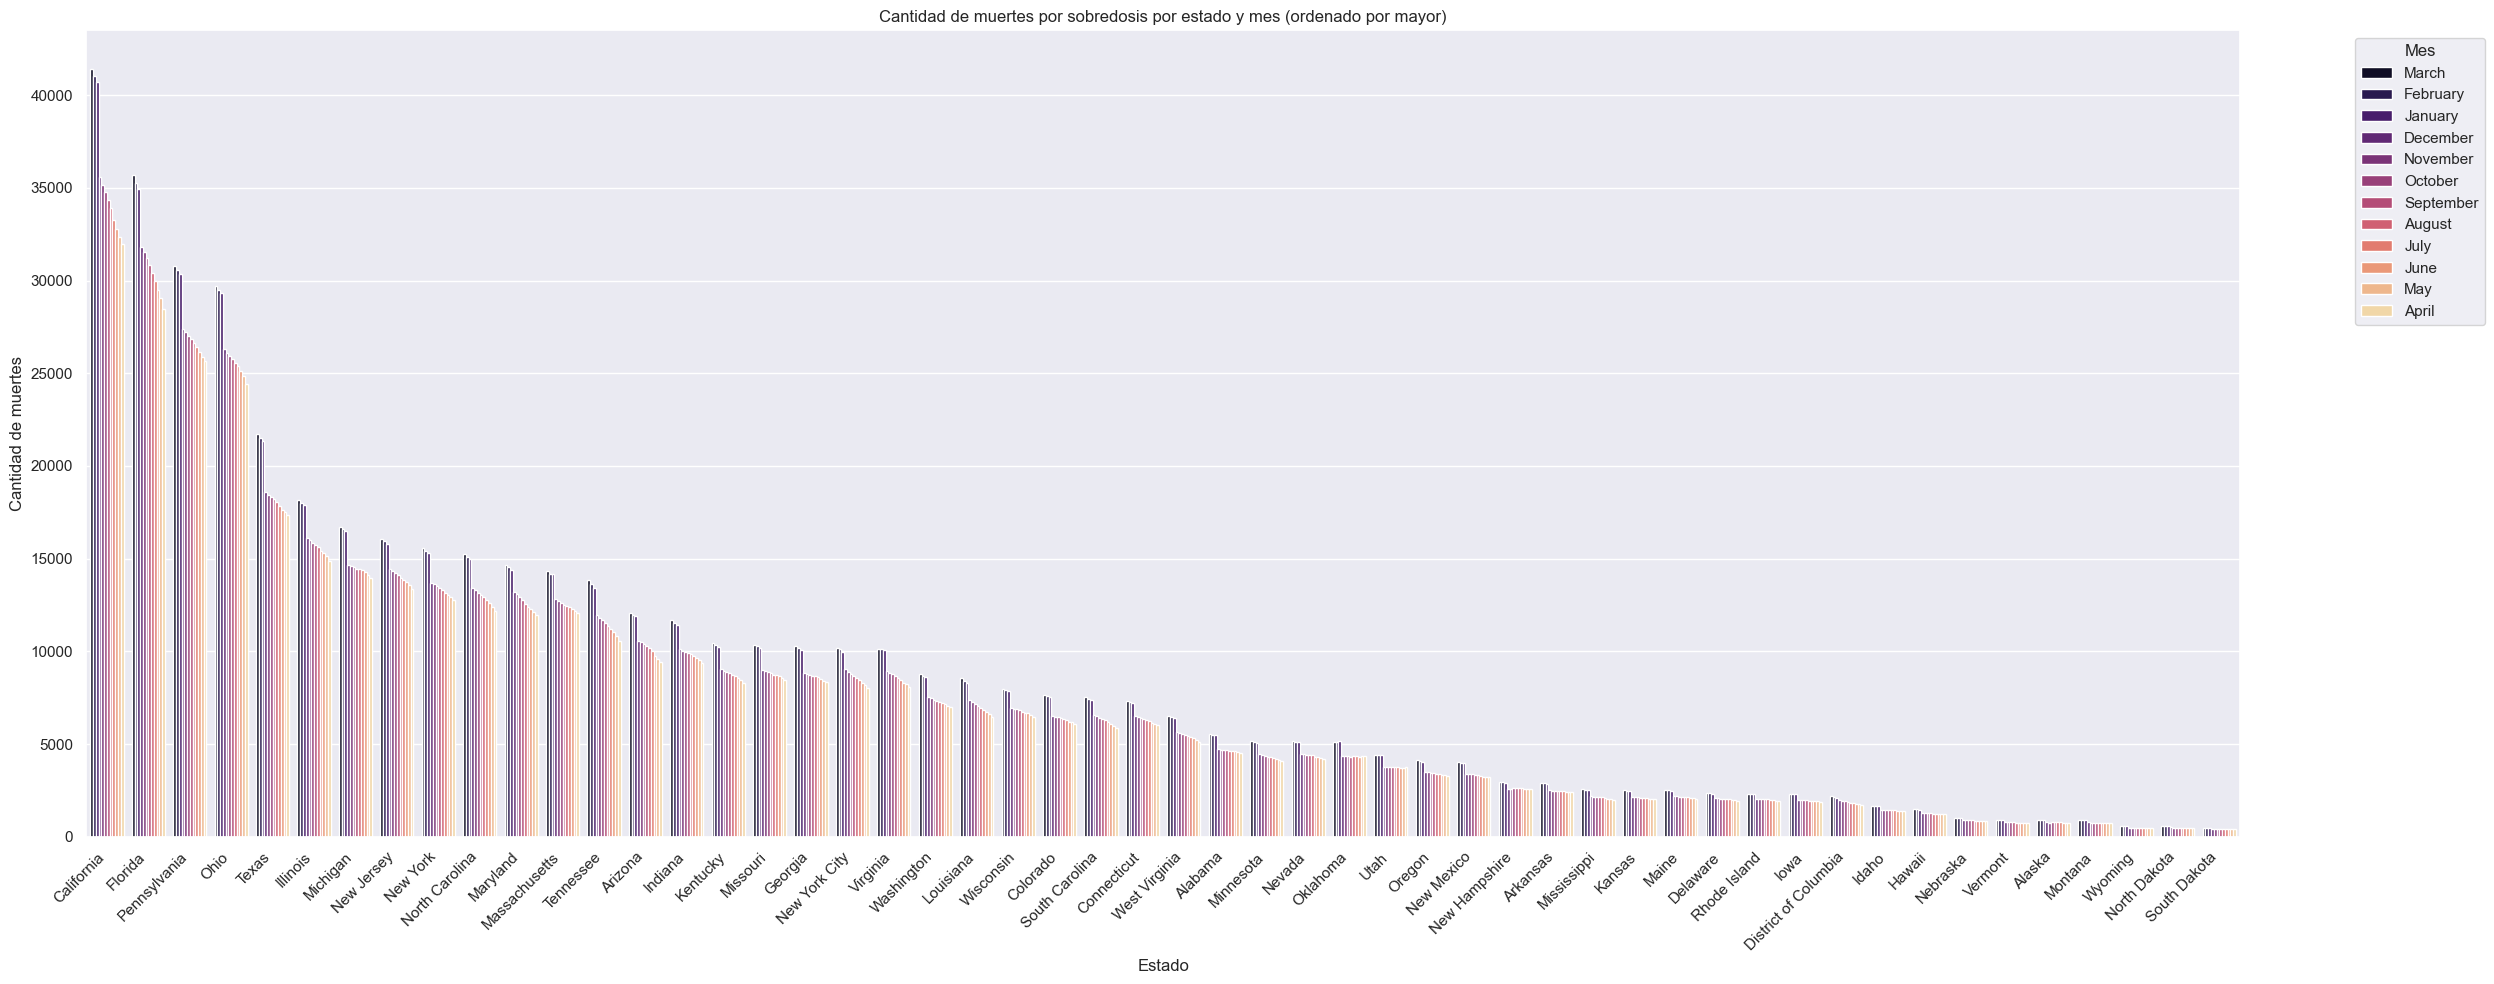

In [59]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_mes = Num_of_drug_Overdose.groupby(['State Name', 'Month'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_mes.sort_values(by='Data Value', ascending=False)


# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(25,10))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Month', palette='magma', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y mes (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Conclusión
#### Los meses de mayor cantidad de muertes por sobredosis son Marzo, Febrero, Enero, Diciembre